# data scaling

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [76]:
def scaling(data1, data2, data3):
    data = data1 + data2 + data3
    max_value = max(data)
    min_value = min(data)
    mean_value = sum(data) / len(data)

    data1 = [(x - mean_value)/ (max_value - min_value) for x in data1]
    data2 = [(x - mean_value)/ (max_value - min_value) for x in data2]
    data3 = [(x - mean_value)/ (max_value - min_value) for x in data3]

    return (data1, data2, data3), (mean_value, max_value, min_value)

In [77]:
data1 = [1,7,5,3]
data2 = [6,2,7,4]
data3 = [7,2,4,5]
(data1, data2, data3), (mean_value, max_value, min_value) = scaling(data1, data2, data3)
print(data1, data2, data3)
print(mean_value, max_value, min_value)


[-0.5694444444444445, 0.4305555555555555, 0.09722222222222217, -0.23611111111111116] [0.26388888888888884, -0.40277777777777785, 0.4305555555555555, -0.06944444444444449] [0.4305555555555555, -0.40277777777777785, -0.06944444444444449, 0.09722222222222217]
4.416666666666667 7 1


In [78]:
data = np.genfromtxt('data_scale.csv', delimiter=',', skip_header=1)
N = len(data)
tv_data = data[:, 0].tolist()
radio_data = data[:, 1].tolist()
newspaper_data = data[:, 2].tolist()
sales_data = data[:, 3].tolist()
(tv_data, radio_data, newspaper_data), (mean_v, max_v, min_v) = scaling(tv_data, 
                                                                    radio_data, 
                                                                    newspaper_data)
print(tv_data[:5])
print(radio_data[:5])
print(newspaper_data[:5])
print(mean_v, max_v, min_v)

[0.5504267881241568, -0.07575404858299574, -0.16785931174089047, 0.285244601889339, 0.3840975033738194]
[-0.09835863697705782, -0.09329790823211856, -0.07103070175438575, -0.08655026990553286, -0.1894517543859647]
[0.007579284750337614, -0.07372975708502003, 0.007916666666666879, -0.028520580296895866, -0.028857962213225157]
66.95349999999993 296.4 0.0


In [79]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi 

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi
    
def update_weight_b(b, dl_db, lr):    
    b  = b - lr*dl_db    
    return b

In [80]:
def initialize_param():
    w1 = random.gauss(mu=0.0, sigma=1.0)
    w2 = random.gauss(mu=0.0, sigma=1.0)
    w3 = random.gauss(mu=0.0, sigma=1.0)
    b = 0
    return w1, w2, w3, b
# initialize model's parameters
w1, w2, w3, b = initialize_param()
print(w1, w2, w3, b)

-0.5129756261118077 0.5981982206572616 -0.5748852316878967 0


In [81]:
epoch_max = 50
lr = 0.01
losses = []

for epoch in range(epoch_max):
    for i in range(N):
        
        # get a sample
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y  = sales_data[i]
        
        # compute output 
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)
        
        # compute loss
        loss = compute_loss(y, y_hat)

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat)
        dl_dw3 = compute_gradient_wi(x3, y, y_hat)
        dl_db  = compute_gradient_b(y, y_hat)


        # update parameters
        w1 = update_weight_wi(w1, dl_dw1, lr)
        w2 = update_weight_wi(w2, dl_dw2, lr)
        w3 = update_weight_wi(w3, dl_dw3, lr)
        b  = update_weight_b(b, dl_db, lr)

        # logging
        losses.append(loss) 

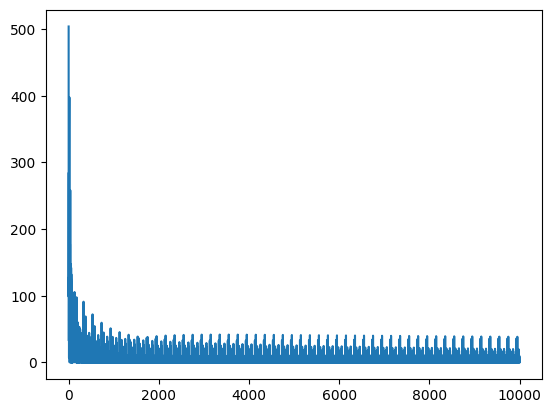

In [82]:
plt.plot(losses)
plt.show()